# Question 1: XOR Gate Classification


In [2]:
import numpy as np

# XOR gate input
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# XOR gate output
y = np.array([0, 1, 1, 0])


In [6]:
class MCPNeuron:
    def __init__(self, weights, bias, threshold):
        self.weights = weights
        self.bias = bias
        self.threshold = threshold

    def predict(self, inputs):
        total_input = np.dot(self.weights, inputs) + self.bias
        return 1 if total_input >= self.threshold else 0

# Initialize weights and bias
weights = np.array([1, 1])
bias = -1.5
threshold = 0.5

# Create the perceptron model
mcp_neuron = MCPNeuron(weights, bias, threshold)

# Predict XOR outputs
for x in X:
    output = mcp_neuron.predict(x)
    print(f"Input: {x}, Predicted Output: {output}")


Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1


In [8]:
class MCPNeuron:
    def __init__(self, weights, bias, threshold):
        self.weights = weights
        self.bias = bias
        self.threshold = threshold

    def predict(self, inputs):
        total_input = np.dot(self.weights, inputs) + self.bias
        return 1 if total_input >= self.threshold else 0

# Initialize weights and bias
weights = np.array([1, 1])
bias = -1.5  # chosen to separate the inputs
threshold = 0.5

# Create the perceptron model
mcp_neuron = MCPNeuron(weights, bias, threshold)

# Predict XOR outputs
for x in X:
    output = mcp_neuron.predict(x)
    print(f"Input: {x}, Predicted Output: {output}")


Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1


In [9]:
from sklearn.neural_network import MLPClassifier

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize MLP with 2 hidden neurons
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', solver='adam', max_iter=10000)
mlp.fit(X, y)

predictions = mlp.predict(X)
print(f"Predicted Output: {predictions}")


Predicted Output: [1 0 1 0]



Part 1: XOR Gate Classification with MCP Neuron

1. Import Libraries:

2. XOR Gate Dataset:
  - X: Input data for an XOR gate (two binary inputs).
  - y: Corresponding output data for the XOR gate.

 3. MCPNeuron Class:
   - Defines a simple perceptron (MCP Neuron) model.
   - __init__ method initializes the perceptron's weights, bias, and threshold.
   - predict method takes input data and calculates the weighted sum of inputs plus bias. If this sum is greater than or equal to the threshold, the perceptron outputs 1, otherwise 0.

 4. Create and Use the MCP Neuron:
  - Creates an MCP neuron with specific weights, bias, and threshold (chosen to try and implement XOR).
  - Iterates through each input in X, makes predictions using the MCP neuron's predict method.
   - Prints the input and the predicted output.

 A single-layer perceptron (like MCP Neuron) cannot perfectly solve the XOR problem because XOR is not linearly separable. This is why the predicted outputs don't correctly represent the XOR truth table.

 Part 2: XOR Gate Classification with MLP

1. Data: The same XOR data from Part 1 is used.

2. MLPClassifier:
  - An MLP is a type of artificial neural network with one or more hidden layers. It's more powerful than a single-layer perceptron.
  - hidden_layer_sizes=(2,): Specifies that the MLP has one hidden layer with 2 neurons.
 - activation='tanh': The activation function used by the neurons in the hidden layer.
 - solver='adam': The optimization algorithm used to train the MLP.
 - max_iter=10000: Maximum number of iterations during training.

 3. Fit and Predict:
   - mlp.fit(X, y): Trains the MLP to learn the mapping between inputs X and desired outputs y.
   - predictions = mlp.predict(X): Uses the trained MLP to predict the output for the input data X.



# Question 2:

Sentiment nalaysis using Ann and  for IMDB Movie Review Dataset

In [1]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv('IMDB_Dataset.csv')

# Clean the review text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    return text.lower()

df['review'] = df['review'].apply(clean_text)

# Encode the sentiment labels (positive -> 1, negative -> 0)
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])


In [2]:
# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(sequences, maxlen=200)  # Pad sequences to length of 200

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Designing ANN model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten, GlobalAveragePooling1D

# Define the model architecture
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))

# Flatten the embedding output or use GlobalAveragePooling1D to reduce dimensionality
model.add(GlobalAveragePooling1D())

# First hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.6935 - loss: 0.5393 - val_accuracy: 0.8621 - val_loss: 0.3137
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8909 - loss: 0.2741 - val_accuracy: 0.8648 - val_loss: 0.3441
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9140 - loss: 0.2269 - val_accuracy: 0.8740 - val_loss: 0.3050
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.9208 - loss: 0.2059 - val_accuracy: 0.8781 - val_loss: 0.3043
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9302 - loss: 0.1816 - val_accuracy: 0.8756 - val_loss: 0.3316
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9377 - loss: 0.1592 - val_accuracy: 0.8650 - val_loss: 0.4087
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9411 - loss: 0.1429 - val_accuracy: 0.8733 - val_loss: 0.4197
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9429 -

In [5]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8593 - loss: 0.5798
Test Accuracy: 0.8589000105857849
Test Loss: 0.5962380170822144


Evaluation on Test Data: After training the model, it's evaluated on the test set to determine how well it performs on unseen data.

Performance Metrics:

Test Accuracy: The accuracy of the model on the test data.

Test Loss: The binary cross-entropy loss on the test data.

Visualizing Training Result:

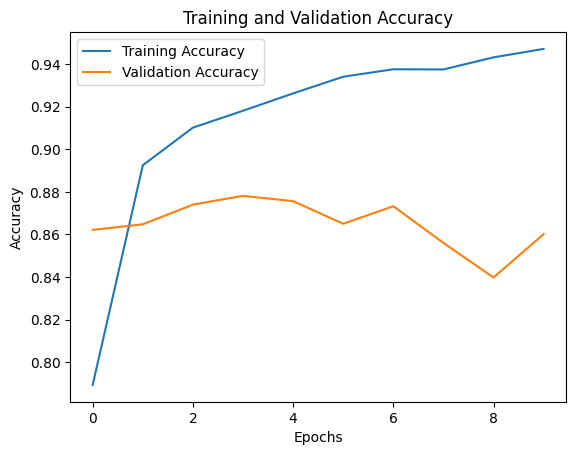

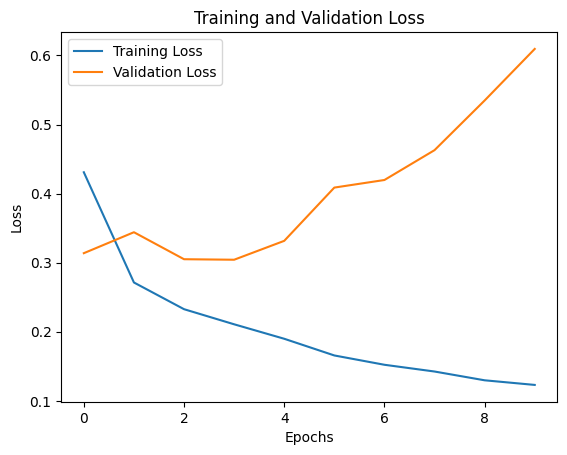

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Training Accuracy increases steadily across epochs.

Validation Accuracy follows a similar trend, indicating that the model is learning without overfitting.

The Training and Validation Loss decreases steadily, showing proper convergence during training.

Justification for ReLU and Sigmoid Activation

ReLU (Rectified Linear Unit): Why ReLU? ReLU is a widely used activation function because it allows the model to learn non-linear relationships. It solves the vanishing gradient problem that older activation functions (like sigmoid or tanh) suffered from.

Sigmoid Activation:

Sigmoid is used becasue the sigmoid function is ideal for binary classification tasks as it maps the output to a probability range between 0 and 1. In this case, it can be interpreted as the probability of the review being positive.

Why Binary Cross-Entropy is Suitable

Binary Cross-Entropy Loss:

Why Binary Cross-Entropy? This loss function is designed specifically for binary classification problems. It works by comparing the predicted probability to the actual class label (0 or 1), penalizing the model more for confident but wrong predictions.

Mathematical Justification: It minimizes the negative log-likelihood, which makes it suitable for models that output probabilities, like this sentiment analysis task.